In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pickle

# 1- Full Data Evaluations

In [2]:
load_model = False # if true, it loads a trained model instead of training a new one
models_folder = 'models\\'
X = np.genfromtxt('processed_data\\X_scaled_pca100.csv', delimiter=',')
y = np.genfromtxt('processed_data\\y.csv', delimiter=',')
mask_train = np.genfromtxt('processed_data\\mask_train.csv', delimiter=',', dtype=bool)

In [3]:
X_train = X[mask_train, :]
X_test = X[~mask_train, :]

y_train = y[mask_train]
y_test = y[~mask_train]

1.1- Training or Loading Model

In [13]:
if load_model:
    with open(models_folder+'clf_pca100.pkl', 'rb') as file:
        clf_pca100 = pickle.load(file)
    print('Full Model Loaded')
else:
    print('Training Linear SVM on PCA100 Data...')
    clf_pca100 = LinearSVC(dual=False, multi_class='ovr')
    clf_pca100 = clf_pca100.fit(X_train, y_train)
    with open(models_folder+'clf_pca100.pkl', 'wb') as file:
        pickle.dump(clf_pca100, file)
    print(f'Model Trained on Full Data and stored at\n\t{models_folder+"clf_pca100.pkl"}')    

Training Linear SVM on PCA100 Data...
Model Trained on Full Data and stored at
	models\clf_pca100.pkl


In [5]:
p_train = clf_pca100.predict(X_train)
p_test = clf_pca100.predict(X_test)

1.2- Metrics for Train Data on Full Model

-- Linear SVM Classifier --
Train Accuracy: 90.84%
Confusion Matrix (Train):
[[5764    1   14   12   10   33   42    6   35    6]
 [   2 6565   32   14    5   30    9   12   64    9]
 [  42   76 5236   83   97   36   91  109  157   31]
 [  27   41  163 5380   10  206   36   74  123   71]
 [  11   33   47    7 5371    9   44   17   52  251]
 [  79   29   54  229   87 4517  138   35  172   81]
 [  39   21   42    5   34   67 5668    4   33    5]
 [  19   30   66   19   70   19    3 5843   22  174]
 [  49  154   82  155   48  199   56   22 4977  109]
 [  43   36   35  109  210   51    4  221   54 5186]]


Normalized Confusion Matrix (Train):
[[97.  0.  0.  0.  0.  1.  1.  0.  1.  0.]
 [ 0. 97.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  1. 88.  1.  2.  1.  2.  2.  3.  1.]
 [ 0.  1.  3. 88.  0.  3.  1.  1.  2.  1.]
 [ 0.  1.  1.  0. 92.  0.  1.  0.  1.  4.]
 [ 1.  1.  1.  4.  2. 83.  3.  1.  3.  1.]
 [ 1.  0.  1.  0.  1.  1. 96.  0.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0. 93.  0.  3.]
 [ 1.  3.  1.  3.  1.  3.  1.  0. 85.  2.]
 [ 1.  1.  1.  2.  4.  1.  0.  4.  1. 87.]]


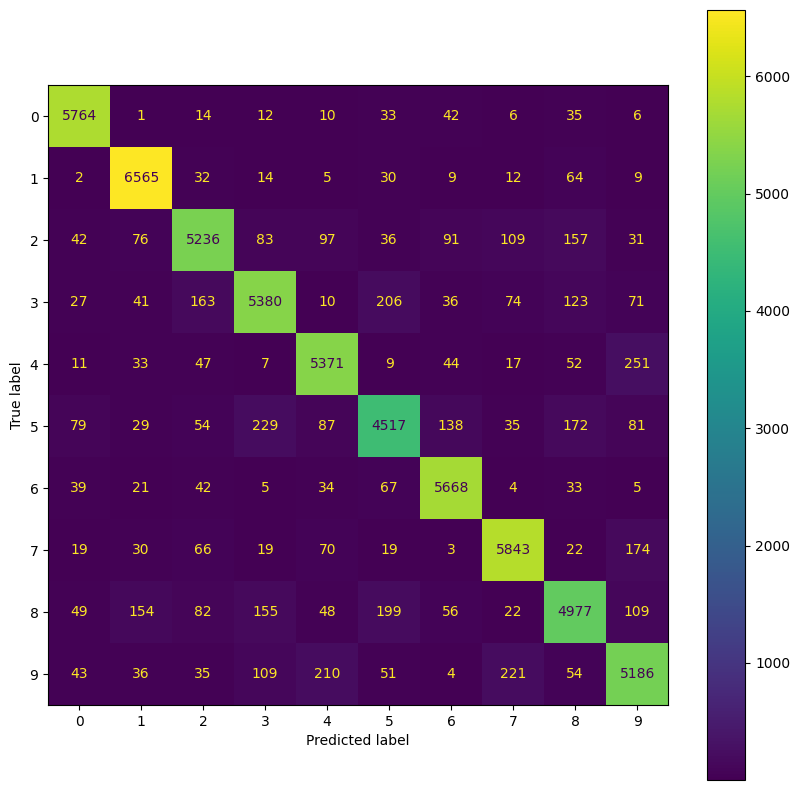

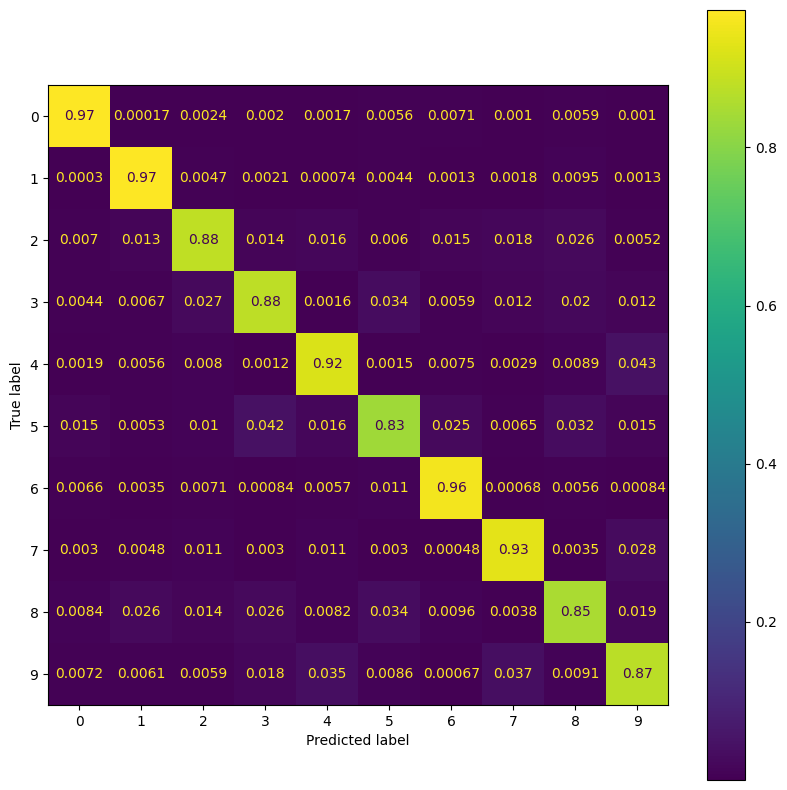

In [6]:
print('-- Linear SVM Classifier --')
print(f'Train Accuracy: {round(clf_pca100.score(X_train, y_train)*100, 2)}%')

cm = confusion_matrix(y_train, p_train)
print(f'Confusion Matrix (Train):\n{cm}')
fig, ax = plt.subplots(figsize=(10,10))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(ax=ax)

cmn = confusion_matrix(y_train, p_train, normalize='true')
print(f'Normalized Confusion Matrix (Train):\n{np.round(cmn*100)}')
fig, ax = plt.subplots(figsize=(10,10))
cmnd = ConfusionMatrixDisplay(cmn)
cmnd.plot(ax=ax)

In [7]:
tp_fp_classes = np.sum(cm, axis=0)
tp_fn_classes = np.sum(cm, axis=1)
list_precisions = []
list_recalls = []
for i in range(cm.shape[0]):
    tp_fp = tp_fp_classes[i]
    tp_fn = tp_fn_classes[i]
    tp = cm[i,i]
    precision = tp / tp_fp
    recall = tp / tp_fn
    list_precisions.append(precision)
    list_recalls.append(recall)
    # print(f'* Class {i} *')
    # print(f'Precision: {precision}')
    # print(f'Recall: {recall}')
    
PR = pd.DataFrame(index=['Precision (Train)', 'Recall (Train)'], columns=range(10))
PR.iloc[0] = list_precisions
PR.iloc[1] = list_recalls
PR

,0,1,2,3,4,5,6,7,8,9
Precision (Train),0.948807,0.939737,0.907295,0.894728,0.903904,0.874202,0.930553,0.921173,0.874846,0.87557
Recall (Train),0.973155,0.973747,0.878818,0.877508,0.919377,0.833241,0.957756,0.932642,0.850624,0.871743


-- Linear SVM Classifier --
Test Accuracy: 91.3%
Confusion Matrix (Test):
[[ 960    0    1    1    0    5    9    1    1    2]
 [   0 1111    1    3    0    2    4    2   12    0]
 [   6    7  916   14    9    7   15   15   36    7]
 [   6    3   19  911    1   23    5   13   19   10]
 [   2    2    6    0  899    1   12    3    9   48]
 [  10    3    5   36   12  757   21    6   30   12]
 [  11    3    6    1    6   15  912    2    2    0]
 [   2    9   24    6    7    3    0  946    1   30]
 [   9   15    9   23   14   37   13   13  833    8]
 [  10    6    3   11   43   11    0   30   10  885]]


Normalized Confusion Matrix (Test):
[[98.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0. 98.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  1. 89.  1.  1.  1.  1.  1.  3.  1.]
 [ 1.  0.  2. 90.  0.  2.  0.  1.  2.  1.]
 [ 0.  0.  1.  0. 92.  0.  1.  0.  1.  5.]
 [ 1.  0.  1.  4.  1. 85.  2.  1.  3.  1.]
 [ 1.  0.  1.  0.  1.  2. 95.  0.  0.  0.]
 [ 0.  1.  2.  1.  1.  0.  0. 92.  0.  3.]
 [ 1.  2.  1.  2.  1.  4.  1.  1. 86.  1.]
 [ 1.  1.  0.  1.  4.  1.  0.  3.  1. 88.]]


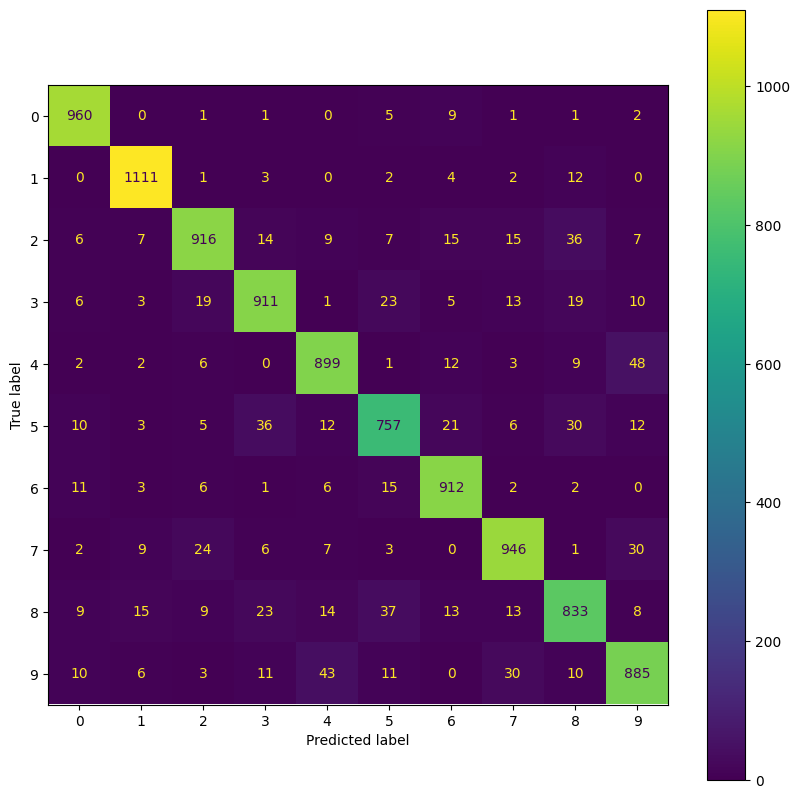

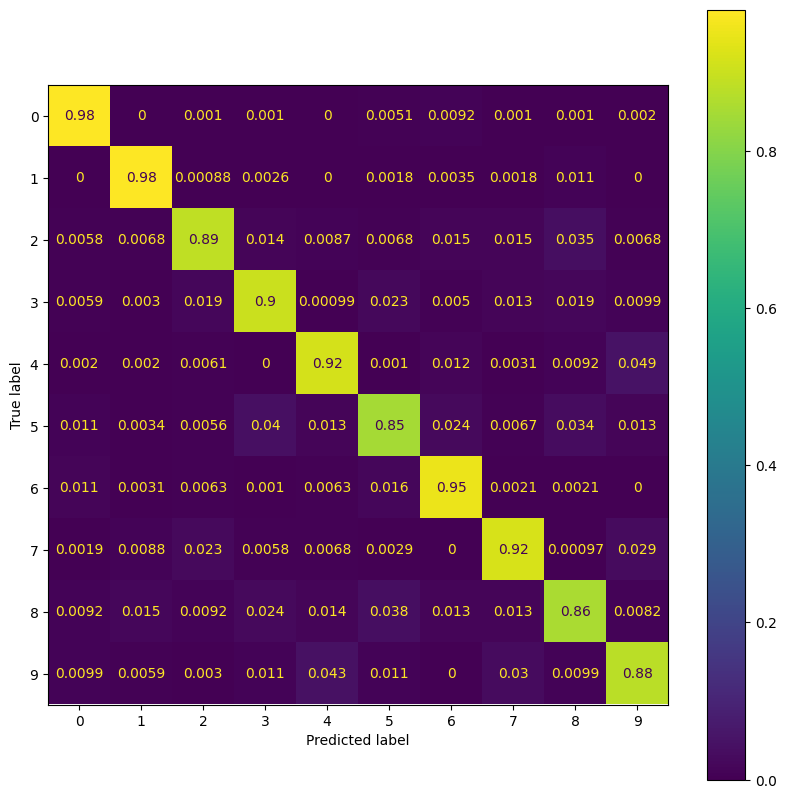

In [8]:
print('-- Linear SVM Classifier --')
print(f'Test Accuracy: {round(clf_pca100.score(X_test, y_test)*100, 2)}%')

cm = confusion_matrix(y_test, p_test)
print(f'Confusion Matrix (Test):\n{cm}')
fig, ax = plt.subplots(figsize=(10,10))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(ax=ax)

cmn = confusion_matrix(y_test, p_test, normalize='true')
print(f'Normalized Confusion Matrix (Test):\n{np.round(cmn*100)}')
fig, ax = plt.subplots(figsize=(10,10))
cmnd = ConfusionMatrixDisplay(cmn)
cmnd.plot(ax=ax)

In [9]:
tp_fp_classes = np.sum(cm, axis=0)
tp_fn_classes = np.sum(cm, axis=1)
list_precisions = []
list_recalls = []
for i in range(cm.shape[0]):
    tp_fp = tp_fp_classes[i]
    tp_fn = tp_fn_classes[i]
    tp = cm[i,i]
    precision = tp / tp_fp
    recall = tp / tp_fn
    list_precisions.append(precision)
    list_recalls.append(recall)
    # print(f'* Class {i} *')
    # print(f'Precision: {precision}')
    # print(f'Recall: {recall}')
    
PR = pd.DataFrame(index=['Precision (Test)', 'Recall (Test)'], columns=range(10))
PR.iloc[0] = list_precisions
PR.iloc[1] = list_recalls
PR

,0,1,2,3,4,5,6,7,8,9
Precision (Test),0.944882,0.958585,0.925253,0.905567,0.907164,0.87921,0.920283,0.917556,0.874082,0.883234
Recall (Test),0.979592,0.978855,0.887597,0.90198,0.915479,0.848655,0.951983,0.920233,0.855236,0.877106


In [10]:
s_train = clf_pca100.decision_function(X_train)
s_test = clf_pca100.decision_function(X_test)
y_train_b = label_binarize(y_train, classes=range(10))
y_test_b = label_binarize(y_test, classes=range(10))

ROC (Train)


(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC (Train)')

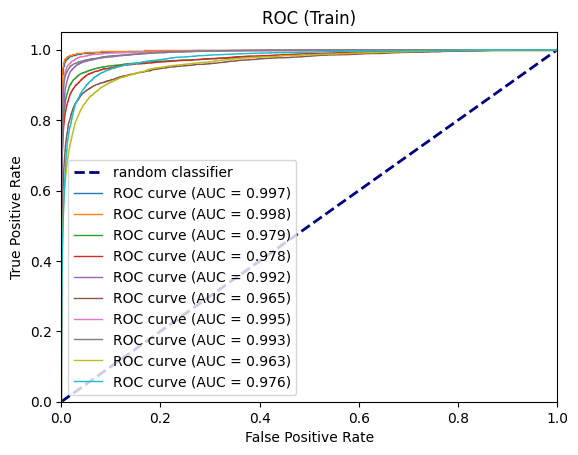

In [11]:
print('ROC (Train)')
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_train_b[:, i], s_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC (Train)")
lw = 1
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=lw)

plt.legend(['random classifier']+[f'ROC curve (AUC = {round(roc_auc[i], 3)})' for i in range(10)])
plt.show()

ROC (Test)


(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC (Test)')

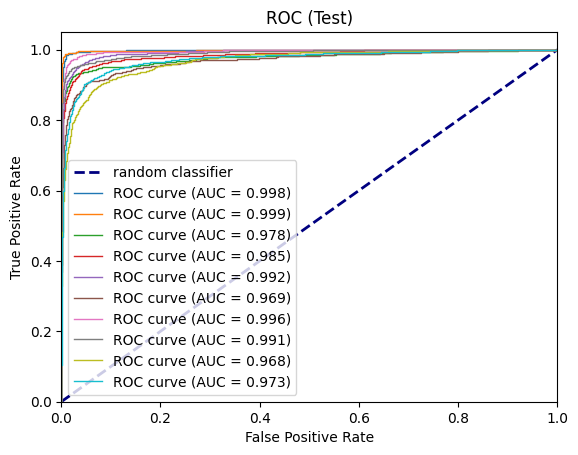

In [12]:
print('ROC (Test)')
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], s_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC (Test)")
lw = 1
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=lw)

plt.legend(['random classifier']+[f'ROC curve (AUC = {round(roc_auc[i], 3)})' for i in range(10)])
plt.show()